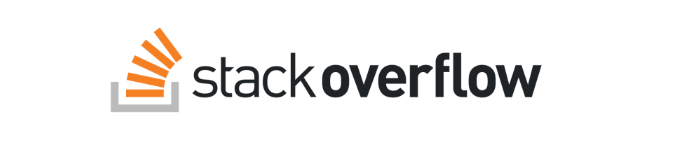

# Compréhension des données

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict, Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud, STOPWORDS
import gc
from langdetect import detect

# Download the required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv("QueryResults.csv")
print(df.shape)

(50000, 8)


In [3]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>,18986098,17,6492,0.0,1
1,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...,971249,82,79057,0.0,13
2,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>,3683450,157,231366,0.0,14
3,SessionTimeout: web.xml vs session.maxInactive...,<p>I'm trying to timeout an <em>HttpSession</e...,<java><session><servlets><weblogic><session-ti...,3118968,65,113655,0.0,2
4,Getting GDB to save a list of breakpoints,"<p>OK, <em><a href=""https://sourceware.org/gdb...",<c++><c><debugging><gdb><breakpoints>,501486,146,51459,0.0,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          50000 non-null  object 
 1   Body           50000 non-null  object 
 2   Tags           50000 non-null  object 
 3   Id             50000 non-null  int64  
 4   Score          50000 non-null  int64  
 5   ViewCount      50000 non-null  int64  
 6   FavoriteCount  43480 non-null  float64
 7   AnswerCount    50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [5]:
df.nunique()

Title            50000
Body             50000
Tags             49090
Id               50000
Score              737
ViewCount        27428
FavoriteCount        3
AnswerCount         65
dtype: int64

In [6]:
# copy
data = df.copy()

## Prétraitement du texte

In [7]:
data = data[['Title', 'Body', 'Tags']]
data.head()

,Title,Body,Tags
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>
1,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...
2,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>
3,SessionTimeout: web.xml vs session.maxInactive...,<p>I'm trying to timeout an <em>HttpSession</e...,<java><session><servlets><weblogic><session-ti...
4,Getting GDB to save a list of breakpoints,"<p>OK, <em><a href=""https://sourceware.org/gdb...",<c++><c><debugging><gdb><breakpoints>


In [8]:
data.isna().sum()

Title    0
Body     0
Tags     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [10]:
# Remove HTML tags from Body column
data['Body_clean'] = data['Body'].apply(lambda x: re.sub('<.*?>', '', x))

In [11]:
data

,Title,Body,Tags,Body_clean
0,Making a particle follow a path in spriteKit,<p>I have created a particle and when I test i...,<ios><iphone><ipad><sprite-kit><skemitternode>,I have created a particle and when I test it m...
1,"How to find the cause of a malloc ""double free...",<p>I'm programming an application in Objective...,<iphone><objective-c><memory-management><mallo...,I'm programming an application in Objective-C ...
2,Handling the window closing event with WPF / M...,<p>I'd like to handle the <code>Closing</code>...,<c#><wpf><xaml><mvvm><mvvm-light>,I'd like to handle the Closing event (when a u...
3,SessionTimeout: web.xml vs session.maxInactive...,<p>I'm trying to timeout an <em>HttpSession</e...,<java><session><servlets><weblogic><session-ti...,I'm trying to timeout an HttpSession in Java. ...
4,Getting GDB to save a list of breakpoints,"<p>OK, <em><a href=""https://sourceware.org/gdb...",<c++><c><debugging><gdb><breakpoints>,"OK, info break lists the breakpoints, but not ..."
...,...,...,...,...
49995,How can I String.Format a TimeSpan object with...,<p>What is the recommended way of formatting <...,<c#><.net><string><time><formatting>,What is the recommended way of formatting Time...
49996,How can Polymorphism replace an if-else statem...,<p>How can polymorphism replace an if-else sta...,<language-agnostic><oop><loops><polymorphism><...,How can polymorphism replace an if-else statem...
49997,What thread does JavaScript code called from F...,"<p>As far as I understand, all JavaScript code...",<javascript><flash><actionscript-3><multithrea...,"As far as I understand, all JavaScript code is..."
49998,Android Gradle's dependency cache may be corru...,"<p>I am trying to import this project, even I ...",<java><android><android-studio><gradle><build....,"I am trying to import this project, even I tri..."


In [12]:
# Define a function to remove punctuations and digits
def remove_punc_digits(text):
    # Remove digits
    text = re.sub('\d+', '', text)
    text = text.lower()
    # Remove punctuations and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [13]:
# Apply the function to Title and Body columns
data['Title_clean'] = data['Title'].apply(remove_punc_digits)
data['Body_clean'] = data['Body_clean'].apply(remove_punc_digits)

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# List of texts to analyze
texts = data['Body_clean']

# Tokenize the texts and convert to lowercase
words = [word.lower() for text in texts for word in nltk.word_tokenize(text)]

# Count the frequency of each word
freq = Counter(words)

# Get the most common 200 words and combine with default NLTK stopwords
most_freq = [word for word, count in freq.most_common(100)]
sw = set(stopwords.words('english')).union(set(most_freq))

# Remove stopwords from the list of words
words_without_sw = [word for word in words if word not in sw]

KeyboardInterrupt: 

In [ ]:
def clean_text(text):
    # Tokenize le texte
    tokens = nltk.word_tokenize(text)
    # Enlève les stopwords
    stopwords_en = set(stopwords.words('english'))
    tokens_without_sw = [token for token in tokens if token not in stopwords_en]
    # Retourne la liste de mots sans stopwords
    return tokens_without_sw

In [ ]:
# Applique la fonction de nettoyage à la colonne "Body"
data['Body_clean'] = data['Body_clean'].apply(clean_text)

In [ ]:
# List of texts to analyze
texts = data['Title_clean']

# Tokenize the texts and convert to lowercase
words = [word.lower() for text in texts for word in nltk.word_tokenize(text)]

# Count the frequency of each word
freq = Counter(words)

# Get the most common 100 words and combine with default NLTK stopwords
most_freq = [word for word, count in freq.most_common(100)]
sw = set(stopwords.words('english')).union(set(most_freq))

# Remove stopwords from the list of words
words_without_sw = [word for word in words if word not in sw]

In [ ]:
# Applique la fonction de nettoyage à la colonne "Body"
data['Title_clean'] = data['Title_clean'].apply(clean_text)

## Fusion des Titles & Body

In [ ]:
data['Texte_clean'] = data['Title_clean'] + data['Body_clean']

In [ ]:
data['Texte_clean'] = data['Texte_clean'].astype(str)

## Filtre Langue

In [ ]:
for index in data.index:
    data.loc[index,'lang'] = detect(data.loc[index,'Texte_clean']) 

data['lang'].value_counts()

In [ ]:
# Filtre Anglais
data = data[data['lang']=='en']

## Pos tag
POS Tagging (Part-of-Speech Tagging) : représente les méthodes qui récupèrent la nature grammatical des mots d’une phrase - nom, verbe, adjectif, etc. Ce sont des propriété qui peuvent servir de caractéristiques utile lors de la création de certains modèles

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

In [ ]:
def remove_verbs(text):

    # tokenisation des mots
    tokens = word_tokenize(text)

    # obtention du type grammatical de chaque mot
    tagged_tokens = pos_tag(tokens)

    filtered_tokens = [word for word, tag in tagged_tokens if tag not in [
        'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',  # verbs
        'PRP', 'PRP$',  # pronouns
        'DT', 'PDT', 'WDT',  # determiners
        'MD'  # modals/auxiliaries
    ]]

    # lemmatisation des mots restants
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(
        token, pos='v') for token in filtered_tokens]

    # sélection des mots non verbaux
    non_verbs = [token for token in lemmatized_tokens if not wn.synsets(
        token, pos=wn.VERB)]

    # reconstruction du texte sans verbes
    cleaned_text = ' '.join(non_verbs)

    return cleaned_text

In [ ]:
data['Texte_clean'] = data['Texte_clean'].astype(str)

In [ ]:
# Applique la fonction de nettoyage à la colonne "Body"
data['Texte_remove'] = data['Texte_clean'].apply(remove_verbs)

In [ ]:
data

In [ ]:
data['Texte_remove'] = data['Texte_remove'].astype(str)

In [ ]:
# remplacer tous les caractères dans la colonne "Text_lem"
data['Texte_remove'] = data['Texte_remove'].str.replace("[", "")
data['Texte_remove'] = data['Texte_remove'].str.replace("]", "")
data['Texte_remove'] = data['Texte_remove'].str.replace("'", "")
data['Texte_remove'] = data['Texte_remove'].str.replace('"', '')
data['Texte_remove'] = data['Texte_remove'].str.replace(",", "")

In [ ]:
data

## Tags (Target)

In [ ]:
# remplacer tous les caractères dans la colonne "Tags"
data['Tags_clean'] = data['Tags'].str.replace("<|>"," ")
data['Tags_clean'] = data['Tags_clean'].str.replace(",+"," ")

In [ ]:
data['Tags_clean'] = data['Tags_clean'].apply(remove_punc_digits)

## Drop Feature prétraitement

In [ ]:
data

In [ ]:
data.drop(['Title', 'Body', 'Tags', 'Body_clean',
          'Title_clean', 'Texte_clean','lang'], axis=1, inplace=True)

## Doublons

In [ ]:
data

In [ ]:
data.duplicated().sum()

In [ ]:
data.duplicated(subset='Texte_remove').sum()

In [ ]:
for col in data.columns:
    n = data.duplicated(subset=col).sum()
    print(f"col: {col} -> duplicated : {n}")

# Exploration

In [ ]:
from collections import Counter

## Tags

In [ ]:
# Visualiser la distribution des longueurs de texte
text_lengths = data['Tags_clean'].str.len()
plt.hist(text_lengths, bins=50)
plt.xlabel('Longueur du texte')
plt.ylabel('Nombre d\'observations')
plt.show()

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, 
                height = 1000,
                background_color ='white',
                max_words = 1000, 
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2"
                ).generate(str(data["Tags_clean"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Outliers

In [ ]:
data['Tags_split'] = data.apply(lambda r :r['Tags_clean'].split(), axis=1)

In [ ]:
def liste_tags(document) :
    dico_tags = {}
    for sentence in document :
        for tag in sentence :
            if tag in dico_tags :
                dico_tags[tag] += 1
            else :
                dico_tags[tag] = 1
    return dico_tags

In [ ]:
dico_tags = liste_tags(data['Tags_split'])

In [ ]:
tags_df = pd.DataFrame(list(dico_tags.items()), columns = ['Tags', 'Quantity'])

In [ ]:
# Trier la feature par ordre décroissant
tags_df.sort_values(by='Quantity', ascending=False)

In [ ]:
tags_df.describe()

In [ ]:
var = 'Quantity'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(tags_df, x=var, bins=30, ax=ax1)
sns.boxplot(tags_df[var], ax=ax2)

In [ ]:
tags_counting_graph = tags_df.sort_values(['Quantity'], ascending=False)
plt.plot(tags_counting_graph['Quantity'].values)
plt.grid(True)
plt.title("Distribution des tags :")
plt.xlabel("Nombre de tags les plus fréquents")
plt.ylabel("Fréquence")

In [ ]:
plt.plot(tags_counting_graph['Quantity'][0:100].values)
plt.grid(True)
plt.title("Distribution des top 100 tags :")
plt.xlabel("Nombre de tags les plus fréquents")
plt.ylabel("Fréquence")

In [ ]:
plt.plot(tags_counting_graph['Quantity'][0:10].values)
plt.grid(True)
plt.title("Distribution des top 10 tags :")
plt.xlabel("Nombre de tags les plus fréquents")
plt.ylabel("Fréquence")

In [ ]:
print("{} tags qui sont utilisés plus de 10 fois".format(tags_df[tags_df["Quantity"]>10].shape[0]))
print("{} tags qui sont utilisés plus de 25 fois".format(tags_df[tags_df["Quantity"]>25].shape[0]))
print("{} tags qui sont utilisés plus de 50 fois".format(tags_df[tags_df["Quantity"]>50].shape[0]))
print("{} tags qui sont utilisés plus de 100 fois".format(tags_df[tags_df["Quantity"]>100].shape[0]))
print("{} tags qui sont utilisés plus de 200 fois".format(tags_df[tags_df["Quantity"]>200].shape[0]))
print("{} tags qui sont utilisés plus de 500 fois".format(tags_df[tags_df["Quantity"]>500].shape[0]))

In [ ]:
# Filtre des tags avec le plus de quantité
tags_df = tags_df[tags_df['Quantity'] >200]

In [ ]:
tags_importante = tags_df['Tags'].tolist()

In [ ]:
tags_importante

In [ ]:
def filter_tags(tags):
    tags_list = tags.split()
    # filtre les tags en gardant uniquement ceux qui sont importants
    filtered_tags = [tag for tag in tags_list if tag in tags_importante]
    if len(filtered_tags) == 0:
        return np.nan
    else:
        # retourne une tuple contenant les tags filtrés et leur longueur
        return ' '.join(filtered_tags), len(filtered_tags)

In [ ]:
# Application de la fonction
data[['Tags_filtered', 'Tags_filtered_len']] = data['Tags_clean'].apply(
    lambda x: filter_tags(x)).apply(pd.Series)

In [ ]:
data = data.dropna(subset=['Tags_filtered'])

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 1000,
                max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2").generate(str(data["Tags_filtered"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Drop features Tags

In [ ]:
data.drop(['Tags_clean', 'Tags_split'], axis=1, inplace=True)

In [ ]:
data

## Texte

In [ ]:
# Visualiser la distribution des longueurs de texte
text_lengths = data['Texte_remove'].str.len()
plt.hist(text_lengths, bins=50)
plt.xlabel('Longueur du texte')
plt.ylabel('Nombre d\'observations')
plt.show()

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 1000,
                max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2").generate(str(data["Texte_remove"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Outliers

In [ ]:
data['Text_split'] = data.apply(lambda r :r['Texte_remove'].split(), axis=1)
filtered_text = data['Text_split'].to_list()

In [ ]:
def build_word_distribution(corpus):
    from nltk import FreqDist
    word_corpus = [token for token_list in corpus for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Words', 'Frequency'])
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)
    return word_dist_df

words_df = build_word_distribution(filtered_text)
print(f"Nombre de tokens du corpus {words_df.shape[0]}")
print("Affichage des 60 tokens les plus utilisés")
display(words_df.head(60))

In [ ]:
var = 'Frequency'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(words_df, x=var, bins=30, ax=ax1)
sns.boxplot(words_df[var], ax=ax2)

In [ ]:
words_counting_graph = words_df.sort_values(['Frequency'], ascending=False)
plt.plot(words_counting_graph['Frequency'].values)
plt.grid(True)
plt.title("Distribution des mots du corpus :")
plt.xlabel("Nombre de mots les plus fréquents")
plt.ylabel("Fréquence")

In [ ]:
plt.plot(words_counting_graph['Frequency'][0:100].values)
plt.grid(True)
plt.title("Distribution des top 100 mots :")
plt.xlabel("Nombre de mots les plus fréquents")
plt.ylabel("Fréquence")

In [ ]:
plt.plot(words_counting_graph['Frequency'][0:10].values)
plt.grid(True)
plt.title("Distribution des top 10 mots :")
plt.xlabel("Nombre de mots les plus fréquents")
plt.ylabel("Fréquence")

In [ ]:
print("{} mots qui sont utilisés plus de 10 fois".format(words_df[words_df['Frequency']>10].shape[0]))
print("{} mots qui sont utilisés plus de 25 fois".format(words_df[words_df['Frequency']>25].shape[0]))
print("{} mots qui sont utilisés plus de 50 fois".format(words_df[words_df['Frequency']>50].shape[0]))
print("{} mots qui sont utilisés plus de 100 fois".format(words_df[words_df['Frequency']>100].shape[0]))
print("{} mots qui sont utilisés plus de 200 fois".format(words_df[words_df['Frequency']>200].shape[0]))
print("{} mots qui sont utilisés plus de 500 fois".format(words_df[words_df['Frequency']>500].shape[0]))
print("{} mots qui sont utilisés plus de 1000 fois".format(words_df[words_df['Frequency']>1000].shape[0]))
print("{} mots qui sont utilisés plus de 5000 fois".format(words_df[words_df['Frequency']>5000].shape[0]))
print("{} mots qui sont utilisés plus de 50000 fois".format(words_df[words_df['Frequency']>50000].shape[0]))

### Dictionnaire d'exception

In [ ]:
# Filtre des mots avec le plus de quantité + garder les tags importante
words_df = words_df[words_df['Tag'].isin(tags_importante) & (words_df['Frequency'] > 1000)]

In [ ]:
words_importante = words_df['Words'].tolist()

In [ ]:
words_importante

In [ ]:
def filter_words(words):
    filtered_words = list(filter(lambda w: w in words_importante, words))
    if len(filtered_words) == 0:
        return np.nan
    else:
        # retourne les words filtrés et leur longueur
        return ' '.join(filtered_words), len(filtered_words)

In [ ]:
# Application de la fonction
data[['Words_filtered', 'Words_filtered_len']] = data['Text_split'].apply(
    lambda x: filter_words(x)).apply(pd.Series)

In [ ]:
data

In [ ]:
data.isna().sum()

In [ ]:
data = data.dropna(subset=['Words_filtered'])

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 1000,
                max_words=1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                colormap="Set2").generate(str(data["Words_filtered"]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Drop features words

In [ ]:
data.drop(['Texte_remove','Text_split'], axis=1, inplace=True)

In [ ]:
data

# Features engineering

In [ ]:
def len_fct(sentence) :
    return len(sentence)

In [ ]:
data["Texte_len"] = data['Words_filtered'].apply(len_fct)
data["Texte_len"].head()

In [ ]:
sns.boxplot(data["Texte_len"])

In [ ]:
sns.distplot(data["Texte_len"])

In [ ]:
data["Tags_len"] = data["Tags_filtered"].apply(len_fct)
data["Tags_len"].head()

In [ ]:
sns.boxplot(data["Tags_len"])

In [ ]:
sns.distplot(data["Texte_len"])

In [ ]:
data["Tags_len_ratio"] = round(data.apply(
    lambda r: (r["Texte_len"] / r["Tags_len"]), axis=1))
data["Tags_len_ratio"].head()

In [ ]:
sns.boxplot(data["Tags_len_ratio"])

In [ ]:
sns.distplot(data["Texte_len"])

# Analyses

In [ ]:
df_feature = df[['Score', 'ViewCount',
                'AnswerCount']]

In [ ]:
df = pd.concat([df_feature,data], axis=1)

## Missing values

In [ ]:
sns.heatmap(df.isna())

In [ ]:
#les total de data pour chaque feature et le pourcentage de missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

## Distribution

In [ ]:
df.describe(include = np.number)

In [ ]:
cols = ['Score', 'ViewCount', 'AnswerCount', 'Texte_len','Tags_len','Tags_filtered_len','Words_filtered_len']

In [ ]:
from scipy.stats import norm
import scipy.stats as st

In [ ]:
# réprésentation avec un displot 
for col in cols:
    plt.figure(figsize=(16, 4))
    sns.distplot(df[col], label="skew: "+str(np.round(df[col].skew(),2)))
    plt.title(col)
    plt.legend()

In [ ]:
for col in cols:
        w, pvalue = st.shapiro(df[col])
        seuil = 0.05
        print(f'{col :-<50} {w} {pvalue}')
        if pvalue > seuil:
            print(
                "On ne peux pas rejetter H0: la distribution suit une loi normale")
        else:
            print(
                "On rejette H0 : la distribution ne suit pas une loi normale")

## Feature Scaling
Application d'une transformation logarithmique sur nos données numériques

In [ ]:
df_transform = df.copy()

In [ ]:
cols_to_scale = ['Score', 'ViewCount', 'AnswerCount', 'Texte_len','Tags_len','Tags_filtered_len']

In [ ]:
# apply log(x+1) element-wise to a subset of columns
df_transform = df_transform[cols_to_scale].applymap(lambda x: np.log(x+1))

In [ ]:
# Visualisation avant / Après log transform
for col1, col2 in zip(cols,cols_to_scale):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    sns.distplot(df[col1], ax=axes[0], label="skew: "+str(np.round(df[col1].skew(),2)))
    axes[0].set_title(f'{col1} Before Log transform')
    sns.distplot(df_transform[col2], ax=axes[1], label="skew: "+str(np.round(df_transform[col2].skew(),2)))
    axes[1].set_title(f'{col2} After Log transform')
    plt.show()

# Analyse multivariée

## Analyse des corrélations

In [ ]:
# Compute correlation coefficients
corr_matrix = df.corr()

In [ ]:
# Print the correlation matrix
corr_matrix

In [ ]:
# Visualize the correlation matrix as a heatmap
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, cmap='coolwarm',
            annot=True, fmt=".2f", square=True)

In [ ]:
# pairplot
sns.pairplot(df)

In [ ]:
# pairplot with hue score
sns.pairplot(df, hue='Score')

In [ ]:
data

# Conclusion exploration

In [ ]:
data.to_csv('QueryResults_explored.csv', index=False, header=True)